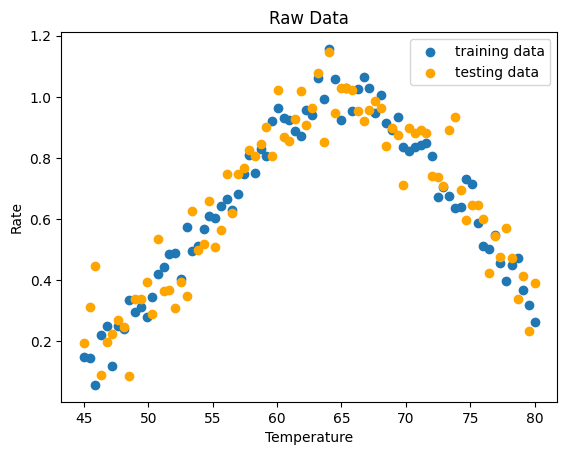

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 生成溫度數據
temperature = np.linspace(45, 80, 80)

# 使用高斯函數模擬率與溫度的關係
optimal_temp = 65  # 峰值溫度
rate = np.exp(-(temperature - optimal_temp)**2 / (2 * 10**2))

# 添加隨機噪聲以生成訓練數據和測試數據
noise = np.random.normal(0, 0.05, temperature.shape)
training_data = rate + noise

# 假設測試數據的噪聲更大一些
test_noise = np.random.normal(0, 0.1, temperature.shape)
testing_data = rate + test_noise

# 繪製散點圖
plt.scatter(temperature, training_data, label='training data')
plt.scatter(temperature, testing_data, color='orange', label='testing data')
plt.title('Raw Data')
plt.xlabel('Temperature')
plt.ylabel('Rate')
plt.legend()
plt.show()


In [19]:
y_train = training_data
x_train = temperature

y_test = testing_data
x_test = temperature

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)


In [21]:
from sklearn.linear_model import LinearRegression

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

LR1 = LinearRegression()
LR1.fit(x_train,y_train)

LinearRegression()

In [32]:

from sklearn.metrics import r2_score

def r2(x_train,x_test,LR1):
    y_train_pre = LR1.predict(x_train)
    y_test_pre = LR1.predict(x_test)
    
    r2_train = r2_score(y_train,y_train_pre)
    r2_test = r2_score(y_test,y_test_pre)
    
    print(r2_train,r2_test)


r2(x_train,x_test,LR1) 

0.1470154982998667 0.15891218608114066


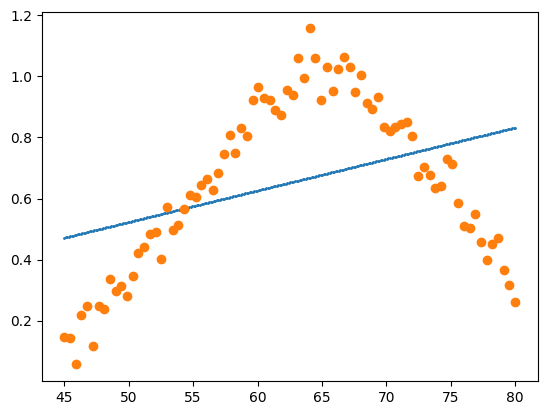

In [27]:
x_model = np.linspace(45,80,300).reshape(-1,1)
y_model = LR1.predict(x_model)

plt.scatter(x_model,y_model,s=1)
plt.scatter(x_train,y_train)

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
x_2_train = poly2.fit_transform(x_train)
x_2_test = poly2.fit_transform(x_test)

LR2 = LinearRegression()
LR2.fit(x_2_train,y_train)

r2(x_2_train,x_2_test,LR2) 


0.9169019182581436 0.8236227225270476


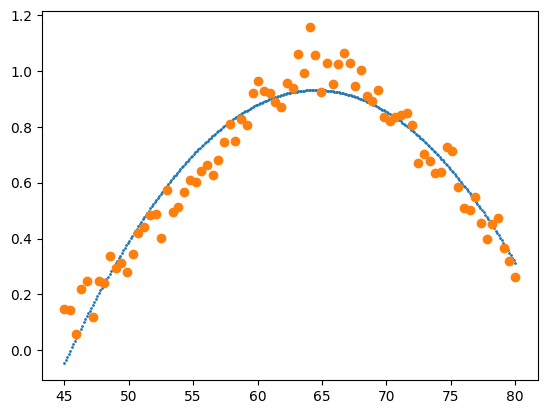

In [42]:
x_2_model = np.linspace(45,80,300).reshape(-1,1)
x_2_model_t = poly2.transform(x_2_model)
y_2_model = LR2.predict(x_2_model_t)

plt.scatter(x_2_model,y_2_model,s=1)
plt.scatter(x_train,y_train)

In [51]:
poly5 = PolynomialFeatures(degree=5)

x_5_train = poly5.fit_transform(x_train)
x_5_test = poly5.fit_transform(x_test)

LR5 = LinearRegression()
LR5.fit(x_5_train,y_train)

r2(x_5_train,x_5_test,LR5) 

0.9634233272514681 0.8927722376939574


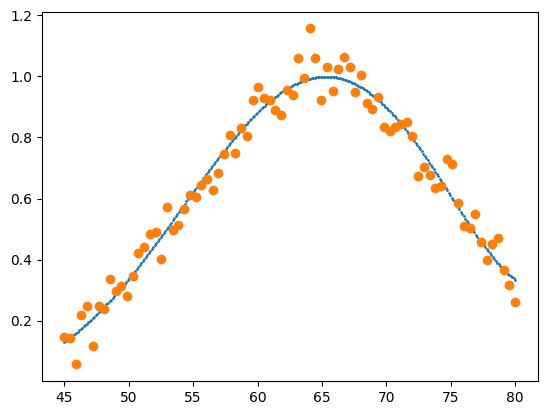

In [53]:
x_5_model = np.linspace(45,80,300).reshape(-1,1)
x_5_model_t = poly5.transform(x_2_model)
y_5_model = LR5.predict(x_5_model_t)

plt.scatter(x_5_model,y_5_model,s=1)
plt.scatter(x_train,y_train)